## Model for the Galton board. Why the balls fill a Gaussian bell?

Each ball thrown colide with one of the pins forming a Pascal triangle of n layers. It is assumed that in each collision the ball will be kicked to the left or to the right by the same displacement. At the end of the triangle each ball will be falling in some X coordinate that is the random variable of interest. Check the script "Central limit theorem.py" for an animation of this model.

The ball will be kicked to the right with probability p and to the left with probability (1-p) so the ball movement is just like a random walk.
If I is a Bernoulli random variable the steps to the right will be:
1) $$ \sum \limits_{i = 1}^{n} I_{i} $$
    And to the left:
2) $$n - \sum \limits_{i = 1}^{n} I_{i} $$
    The X position of the ball at the end of the Pascal triangle will be:
3) $$X = \Delta X\sum \limits_{i = 1}^{n} I_{i} -\Delta X(n - \sum \limits_{i = 1}^{n} I_{i}) = 2 \Delta X\sum \limits_{i = 1}^{n} I_{i} - n\Delta X $$
    According to the central limit theorem:
4) $$P\left(\sqrt{n}\frac{\bar I - p}{\sqrt{p(1-p)}} \leq z\right) \rightarrow \Phi (z)$$
5) $$\bar {I} =\frac{\sum \limits_{i = 1}^{n} I_{i}}{n}$$  
    If one solve for mean(I) asigning p = 1/2 (both directions equally likely):
6) $$\bar {I} = \frac{Z}{2\sqrt{n}} + 1/2$$
    Where Z in the limit (n -> infinity) case is a random variable with standar normal distribution. Using equations 5 and 6 into 3:
7) $$ X = \Delta X \sqrt{n} \, Z$$

From 7) X tends to a normal distribution with mean cero (center of the board) and standar deviation $$\bar {X} = 0,\;\;\; \sigma = \Delta X \sqrt{n}$$

In [389]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from scipy.stats import norm

In [390]:
# Constants
DX = 24 # Fix displacement on x
BOARD_WIDTH = 600 
N_PASCAL = 12 # Number of rows of the Pascal triangle
n = 900 # Number of balls


In [391]:
def x_ball(n_pins, x_displacement, board_width):
    ''' 
    returns the X coordinate
    n_pins: int, represents the number of layers of Pascal's triangle
    x_displacement: int, the delta x displacemente in each iteration
    board_width: int size of the board to get the spread for X
    '''
    left_count = 0
    right_count = 0
    for i in range(n_pins):
        result = rn.choice([0, 1])
        if result:
            right_count += 1
        else:
            left_count += 1
    return (board_width // 2) + x_displacement*(right_count - left_count)

def run_balls(n_balls, n_pins, x_displacement, board_width):
    '''
    Return a list with the Xs for n_balls
    n_pins: int, represents the number of layers of Pascal's triangle
    x_displacement: int, the delta x displacemente in each iteration
    board_width: int size of the board to get the spread for X
    '''
    X_list = []
    for _ in range(n_balls):
        X_list.append(x_ball(n_pins, x_displacement, board_width))
    return X_list

In [392]:
#standar deviation
std = DX * np.sqrt(N_PASCAL)
print(std)

83.13843876330611


In [393]:
normal_x_samples = np.random.normal(loc=300, scale=std, size=900)

In [394]:
ball_landings = run_balls(n_balls=n, n_pins=N_PASCAL, x_displacement=DX, board_width=BOARD_WIDTH)

In [395]:
# pdf values
x = [i for i in range(600) if i%2]
y = list(map(lambda j: norm.pdf(j, 300, std), x))


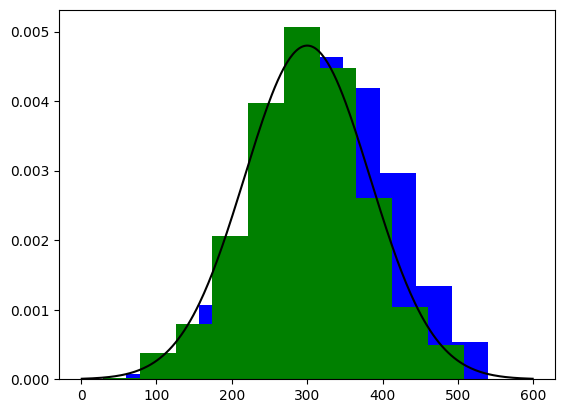

In [396]:

fig, ax = plt.subplots(1, 1)

# Samples from the ball process
ax.hist(ball_landings, density=True, color='blue')
# Samples from the normal distribution
ax.hist(normal_x_samples, density=True, color='green')
# Normal density
ax.plot(x, y, color='black')

In [397]:
print(np.std(ball_landings, ddof=1))

85.05817521078794
